#### Test Newton Raphson and Logistic Regression
The source code of our implementation could be found in this [directory](https://github.com/Xianzhiwang1/Leet-Code-Project/tree/main/posts/blog-02-newton-raphson) on github along with this blog post.


In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
from matplotlib.patches import Patch
import seaborn as sns
# from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import rbf_kernel

In [28]:
from sklearn.datasets import make_blobs
from Newton_Raphson_test import Newton_Raphson

In [29]:
# create test data set
X_train, y_train = make_blobs(n_samples=300, centers = 2, cluster_std= 2.5, n_features=2, random_state=42)
print(f"shape of X_train is: {np.shape(X_train)}")
print(f"shape of y_train is: {np.shape(y_train)}")
print(f"X_train.shape[0] is: {X_train.shape[0]}")
print(f"y_train.shape[0] is: {y_train.shape[0]}")
print(f"X_train.shape[1] is: {X_train.shape[1]}")

shape of X_train is: (300, 2)
shape of y_train is: (300,)
X_train.shape[0] is: 300
y_train.shape[0] is: 300
X_train.shape[1] is: 2


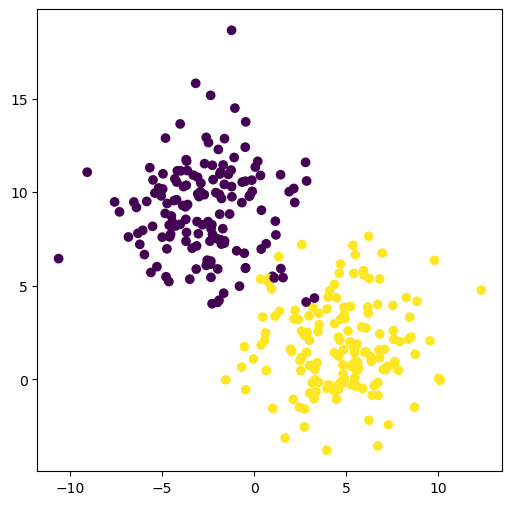

In [30]:
# plot test data set
plt.figure(figsize=(6,6))
plt.scatter(X_train[:,0],X_train[:,1], c=y_train)

In [31]:
myNR = Newton_Raphson()
myNR.regress(y = y_train, X = X_train, max_iters=1e3, tol=1e-9, converged=False)

number of iteration: 10
beta: [[ 0.88131503]
 [-0.8612759 ]
 [ 3.62857607]]
number of iteration: 20
beta: [[ 1.05875831]
 [-1.08493095]
 [ 4.57156319]]
number of iteration: 30
beta: [[ 1.05911467]
 [-1.08539209]
 [ 4.57354849]]
number of iteration: 40
beta: [[ 1.05911502]
 [-1.08539254]
 [ 4.57355043]]
Converged with 41 iterations
The beta we end up with is: [[ 1.05911502]
 [-1.08539254]
 [ 4.57355043]]


In [32]:
# NR.big_plot(X_train, y_train, X_validate, y_validate, X_test, y_test, 30, 10)

the weight beta is: [[ 1.05911502]
 [-1.08539254]
 [ 4.57355043]]
the score of our Newton_Raphson implementation is: 0.9733333333333334


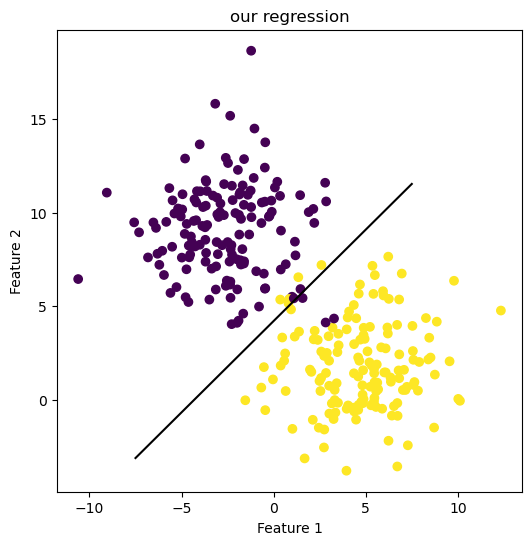

In [33]:
myNR.bare_bone_plot(X_train, y_train, 6,6)
print(f"the score of our Newton_Raphson implementation is: {myNR.score(X_train,y_train)}")
# print(NR.score(X_test,y_test))
# print(NR.score(X_validate,y_validate))

#### Now, we take a look at the Newton's Method in Logistic Regression provided to us by `sklearn` library.

In [34]:
LR = LogisticRegression(solver="newton-cg")
LR.fit(X_train, y_train)
LR.coef_

array([[ 0.98557955, -1.00811845]])

In [35]:
# LRscoreTest = LR.score(X_test, y_test)
# print(LRscoreTest)
LRscoreTrain= LR.score(X_train, y_train)
print(LRscoreTrain)

0.9733333333333334


In [36]:
# y_test= y_test.reshape(-1)
# NR.simple_plot(LR, X_test, y_test, 5, 5)

[[ 0.98557955 -1.00811845]]
4.250774512606014


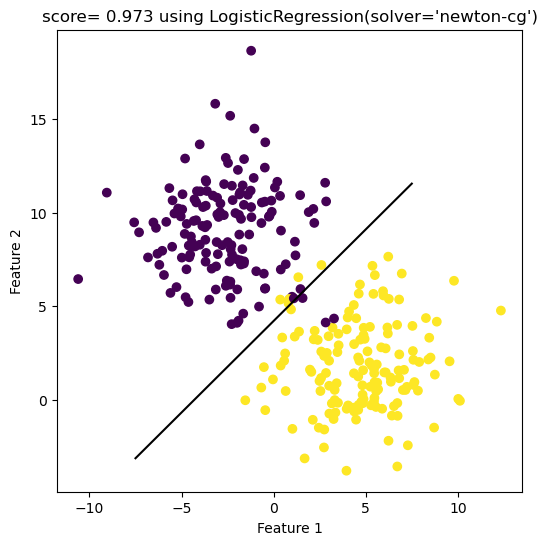

In [37]:
print(LR.coef_)
a_0 = LR.coef_[0][0]
a_1 = LR.coef_[0][1]
print(LR.intercept_[0])
plt.rcParams["figure.figsize"] = (6,6)
fig = plt.scatter(X_train[:,0], X_train[:,1], c = y_train)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
f1 = np.linspace(-7.5,7.5, 501)
p = plt.plot(f1, - (LR.intercept_/a_1) - (a_0/a_1)*f1, color = "black")
title = plt.gca().set_title(f"score= {round(LRscoreTrain,3)} using {LR}")

It looks like we made it! Our implementation and the one from `sklearn` perform in the same way.